### Os tweets foram coletados a partir de comandos no terminal em um ambiente virtual contendo a biblioteca TwitterScraper

    twitterscraper covid -l 100000 -bd 2020-07-14 -ed 2020-07-15 --lang pt -o covid100k.json

#### Só foi possível coletar 30 mil tweets.

### Lendo arquivo JSON

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
tweets = pd.read_json('covid30k.json', encoding='utf-8')

### Filtrando colunas relevantes

In [110]:
tweets = tweets[['text', 'screen_name', 'likes', 'retweets', 'timestamp']].sort_values(by='likes', ascending=False).reset_index()

In [113]:
tweets['day'] = tweets['timestamp'].apply(lambda x: str(x).split(' ')[0])

In [114]:
tweets = tweets[['text', 'screen_name', 'likes', 'retweets', 'day']]

### Salvando como CSV

In [115]:
tweets.to_csv('tweets.csv', index=False)

## Identificando usuários que mais tweetam

In [116]:
tweets['count'] = 1

In [117]:
tweeters = tweets.groupby('screen_name').sum().sort_values(by='count', ascending=False)

In [118]:
top5 = tweeters.index[:5].tolist() # Lista com as 10 palavras mais frequentes
amount_top5 = tweeters['count'][:5].tolist() # Lista com a frequência dessas palavras

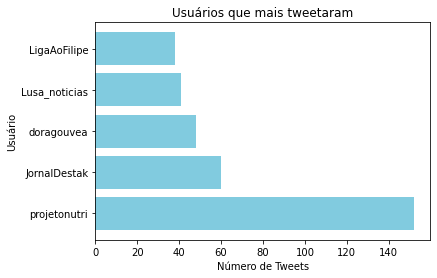

In [119]:
plt.barh(top5, amount_top5, color=(129/255, 203/255, 223/255, 1))
plt.title('Usuários que mais tweetaram')
plt.xlabel('Número de Tweets')
plt.ylabel('Usuário')
plt.show()

## Identificando usuários mais curtidos

In [120]:
tweeters_liked = tweeters.sort_values(by='likes', ascending=False)

In [121]:
top5 = tweeters_liked.index[:5].tolist() # Lista com as 10 palavras mais frequentes
amount_top5 = tweeters_liked['likes'][:5].tolist() # Lista com a frequência dessas palavras

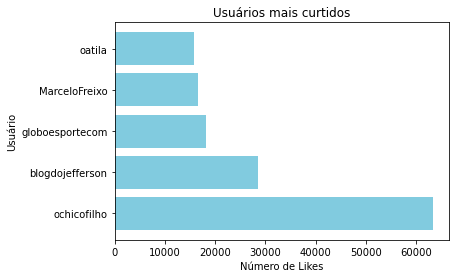

In [122]:
plt.barh(top5, amount_top5, color=(129/255, 203/255, 223/255, 1))
plt.title('Usuários mais curtidos')
plt.xlabel('Número de Likes')
plt.ylabel('Usuário')
plt.show()

## Identificando usuários mais retweetados

In [123]:
tweeters_retweeted = tweeters.sort_values(by='retweets', ascending=False)

In [124]:
top5 = tweeters_retweeted.index[:5].tolist() # Lista com as 10 palavras mais frequentes
amount_top5 = tweeters_retweeted['retweets'][:5].tolist() # Lista com a frequência dessas palavras

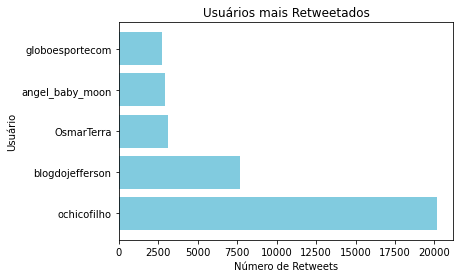

In [125]:
plt.barh(top5, amount_top5, color=(129/255, 203/255, 223/255, 1))
plt.title('Usuários mais Retweetados')
plt.xlabel('Número de Retweets')
plt.ylabel('Usuário')
plt.show()